In [1]:
import numpy as np
import pandas as pd

In [2]:
#https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

### `Q-1:` 
i. Create a DataFrame birds from the above dictionary data which has the index labels. 

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [8]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

#1
pd_data=pd.DataFrame(data,index=labels)
pd_data

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [9]:
#2
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [10]:
pd_data.describe()

,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [13]:
pd_data.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### `Q-2:` 
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [23]:
#1
pd_data[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [30]:
#2
pd_data[pd_data['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:` 
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [48]:
#1
pd_data[pd_data.age.isna() | pd_data.visits.isna()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [54]:
#pd_data.age.mode()[0]
#2
pd_data.age.fillna(pd_data.age.mode()[0],inplace=True)
pd_data.visits.fillna(pd_data.visits.mode()[0],inplace=True)

In [56]:
pd_data[pd_data.age.isna() | pd_data.visits.isna()]

,birds,age,visits,priority


### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [66]:
#1
pd_data[pd_data['birds']=='Cranes']['visits'].sum()

14

In [69]:
#2
pd_data['birds'].value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [74]:
#3
#pd_data[pd_data.duplicated()]
pd_data.duplicated().sum()

2

In [76]:
#4
pd_data.drop_duplicates(inplace=True)

In [77]:
pd_data

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


## Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

### `Q-5:` In IPL matches dataset some teams name has changed. 
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils' 
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams. 

In [85]:
ipl=pd.read_csv('IPL_Matches_2008_2022.csv')
changed_name={
    'Delhi Capitals':'Delhi Daredevils', 
    'Punjab Kings':'Kings XI Punjab',
    'Rising Pune Supergiant':'Rising Pune Supergiants'
}

ipl.replace(changed_name.keys(),changed_name.values,inplace=True)

In [140]:
ipl.head(15)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,<built-in method values of dict object at 0x00...,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,<built-in method values of dict object at 0x00...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,<built-in method values of dict object at 0x00...,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5.0,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8.0,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit


### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)

<Axes: >

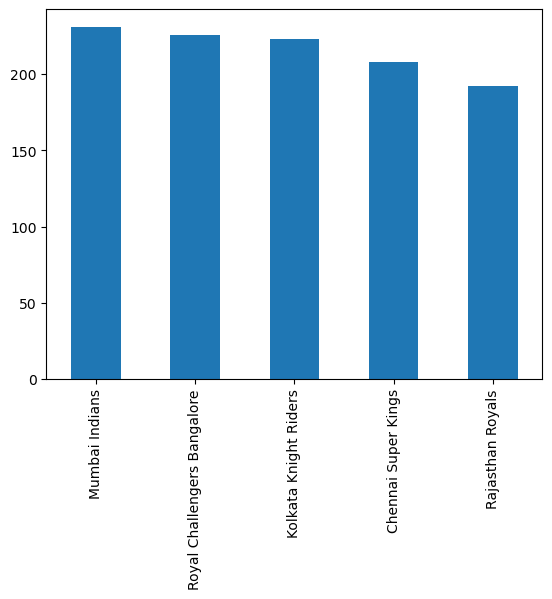

In [101]:
(ipl['Team1'].value_counts()+ipl['Team2'].value_counts()).sort_values(ascending=False).head(5).plot(kind='bar')

### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.

In [116]:
m1=(ipl['Team1']=='Mumbai Indians') | (ipl['Team2']=='Mumbai Indians')
m2=ipl['WinningTeam']!='Mumbai Indians'
ipl[m1 & m2].Player_of_Match.value_counts().head(1)

SPD Smith    4
Name: Player_of_Match, dtype: int64

### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [131]:
def team1_vs_team2(t1,t2):
    m1=(ipl['Team1']==t1) | (ipl['Team2']==t1) # Filter for matches where only t1 played
    m2=(ipl['Team1']==t2) | (ipl['Team2']==t2) # Filter for matches where only t2 played
    df1=ipl[m1 & m2]
    print(df1.WinningTeam.value_counts())
    print(df1.Player_of_Match.value_counts().head(1))

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

Chennai Super Kings      17
Kolkata Knight Riders     9
Name: WinningTeam, dtype: int64
RA Jadeja    3
Name: Player_of_Match, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart. 

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*


<Axes: >

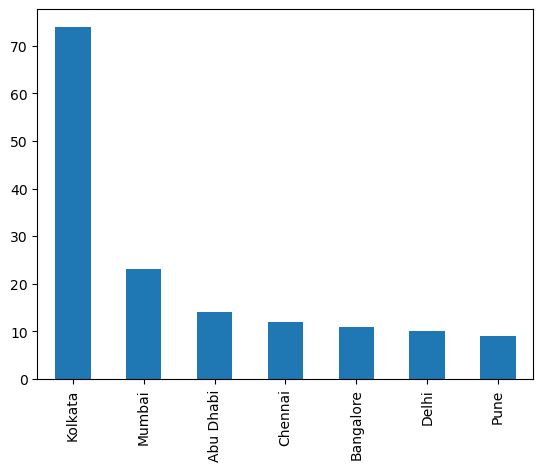

In [139]:
ipl[(ipl['Team1']=='Kolkata Knight Riders') | (ipl['Team2']=='Kolkata Knight Riders')].City.value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [150]:
ipl[((ipl['Team1']=='Mumbai Indians') | (ipl['Team2']=='Mumbai Indians')) & (ipl['Season']=='2011')].Margin.mean()

19.25